In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df_index = pd.read_csv(r"economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [44]:
# drop column which are not related to your model

## this line will not drop this many columns
## 1. inplace = True -> add this parameter inside this function then this could remove those column and store the remaining column in df_index
df_index.drop(columns = ["Unnamed: 0","year","month"],axis = 1,inplace = True) 

## 2. if you don't want to use inplace, then simply store that output in df_index itself, so changes are applicable/updated to it
# df_index = df_index.drop(columns = ["Unnamed: 0","year","month"],axis = 1)

df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


# check null values

In [45]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


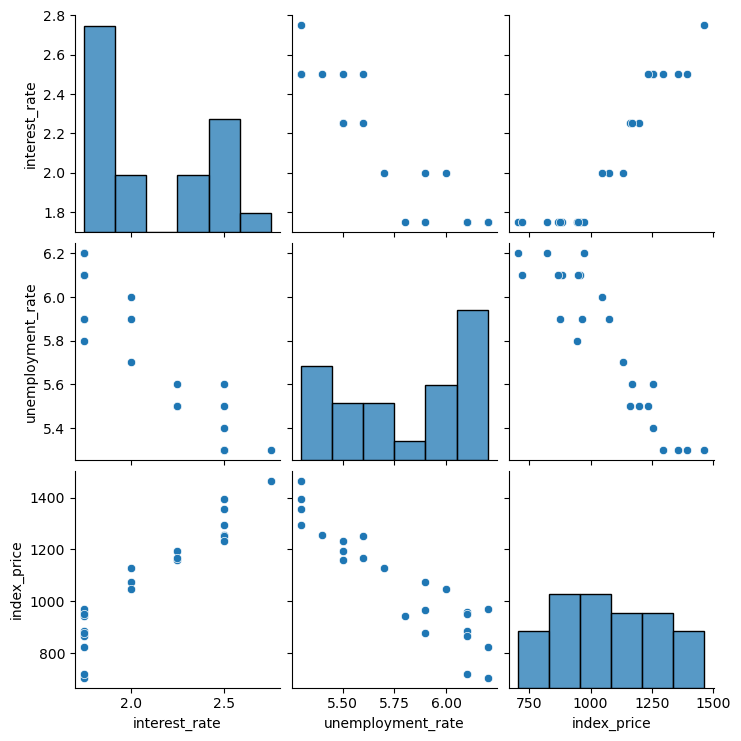

In [46]:
## lets do soome visualization
# in seaborn you have one code and get different graphs

import seaborn as sns
sns.pairplot(df_index)

In [47]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

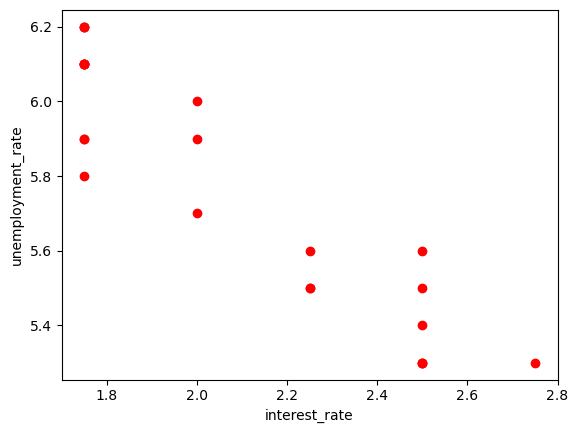

In [48]:
## visualize the datapoints more closely
# in matplotlib you have to write different code for different graphs

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'], color = 'r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

Text(0, 0.5, 'index_price')

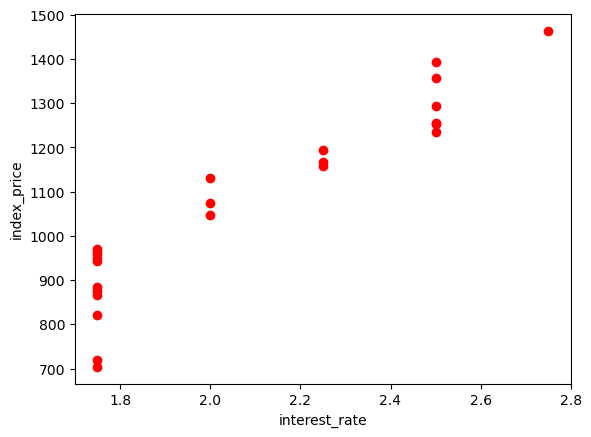

In [49]:
plt.scatter(df_index['interest_rate'],df_index['index_price'], color = 'r')
plt.xlabel("interest_rate")
plt.ylabel("index_price")

Text(0, 0.5, 'unemployment_rate')

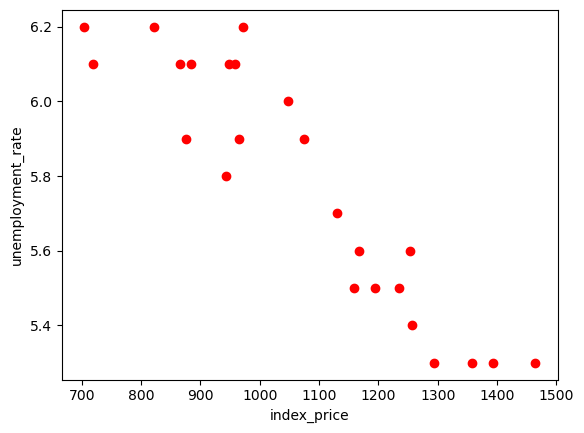

In [50]:
plt.scatter(df_index['index_price'],df_index['unemployment_rate'], color = 'r')
plt.xlabel("index_price")
plt.ylabel("unemployment_rate")

# Independent and Dependent feature

In [51]:
## X = df_index[['interest_rate','unemployment_rate']] -> 2D array -  you can do this way also for x
X = df_index.iloc[:,:-1] # iloc[starting index,ending index(excluding)] but here iloc[all the rows,last row]

## y = df_index['index_price'] -> 1D array - also do this for y
y = df_index.iloc[:,-1] 

In [52]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [53]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

## Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [55]:
X_train.shape

(18, 2)

In [56]:
X_test.shape

(6, 2)

<Axes: xlabel='interest_rate', ylabel='index_price'>

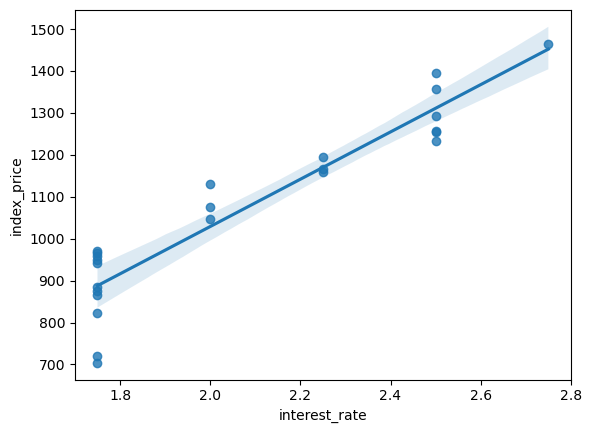

In [57]:
sns.regplot(x = 'interest_rate', y = 'index_price', data = df_index) # regplot = regression plot between 2 variables only.

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

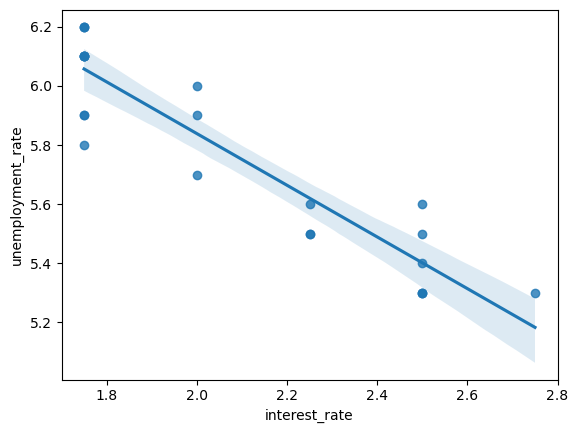

In [58]:
sns.regplot(x = 'interest_rate', y = 'unemployment_rate', data = df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

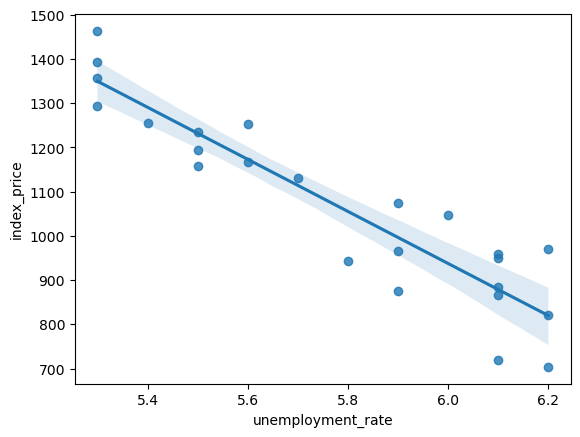

In [59]:
sns.regplot(x = 'unemployment_rate', y = 'index_price', data = df_index)

## Standardization

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [63]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

## Machine Learning Algorithm - Multiple Linear Regression (2 Independent feature)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regression = LinearRegression()

In [66]:
regression.fit(X_train,y_train)

LinearRegression()

In [67]:
print("coefficient or slope: ", regression.coef_) ## one unit movement in weight then it should 17.298 times movement in height
print("intercept: ",regression.intercept_)

coefficient or slope:  [  88.27275507 -116.25716066]
intercept:  1053.4444444444443


In [68]:
## cross validation score
# cv (cross validation) = n -> this parameter suggest that (n times) you should train the model internally with different (n) dataset samples 
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error',cv = 3)

In [69]:
## this will give that many values which are set in cv
# here you give cv = 3, so we getting 3 -ve MSE
validation_score 

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [70]:
np.mean(validation_score)

-5914.828180162388

## Testing

In [71]:
y_pred = regression.predict(X_test)

In [72]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5793.762887712583
59.93578152323558
76.11677139574815


# R Square

Formula

### R^2 = 1 - SSR/SST

In [74]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.8278978091457141


# Adjusted R Square

Formula

### Adjusted R2 = 1 - [(1-R2)*(N-1)/(N-P-1)]

In [75]:
1 - (1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

0.7131630152428567

## Assumptions

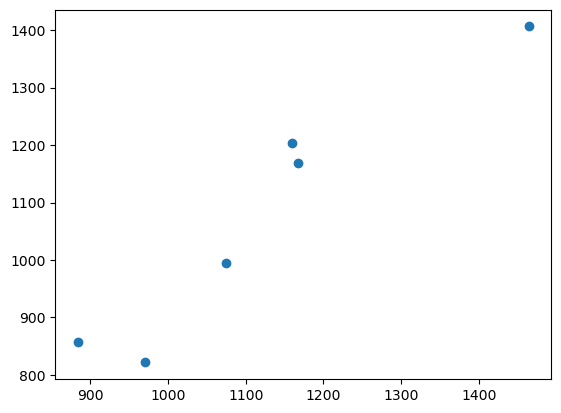

In [76]:
## 1. if your y_test is linear relationship with y_pred -> that's a good thing - model perform well
plt.scatter(y_test,y_pred)

In [77]:
## 2. if your displot of residualsi is like bell-curve(like normal distributed data) -> your model will perform well
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


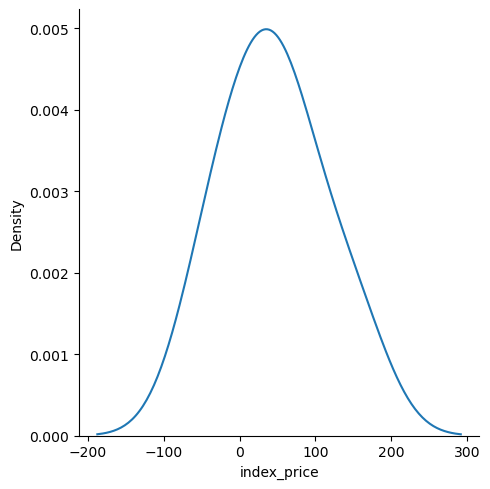

In [78]:
## plot residuals with displot in seaborn
sns.displot(residuals,kind = 'kde')

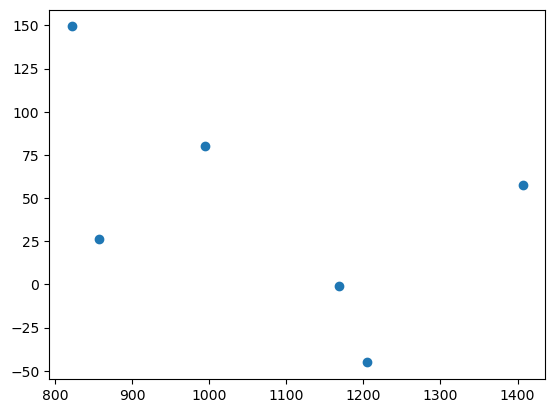

In [79]:
## 3. scatter plot with residuals and predictions 
# if in this graph points are uniformly distributed (or data is spread everywhere) (or don't show any pattern), model perform well(good model)
plt.scatter(y_pred,residuals)

## Multiple Linear regression with OLS(Ordinary Least Square)

In [80]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [81]:
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [82]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                       0.754
Time:                        19:42:29   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
